In this use case, we will use the data provided by the advertising team at GoDaddy to predict if a particular user will click on the advertisement. The dataset contains past transaction data with user's demographic details. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('advertising.csv')

The data consists of 10 variables: 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', Timestamp' and 'Clicked on Ad'. The main variable we are interested in is 'Clicked on Ad'. We will see if we can use the other 9 variables to accurately predict the value 'Clicked on Ad' variable.

In [3]:
data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Ad Platform,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Facebook,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,Pinterest,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Google Ads,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,Instagram,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,Pinterest,0,Iceland,6/3/2016 3:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Instagram,1,Norway,5/19/2016 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Facebook,0,Myanmar,1/28/2016 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Google Ads,1,Australia,3/7/2016 1:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,Facebook,1,Grenada,4/18/2016 9:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Instagram,1,Ghana,7/11/2016 1:42,0


In [4]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


An interesting fact from the table is that the smallest area income is $13,996.50 and the highest is $79,484.80. This means that site visitors are people belonging to different social classes. It can also be concluded that we are analyzing a popular website since users spend between 32 and 91 minutes on the website in one session. These are really big numbers!

Furthermore, the average age of a visitor is 36 years. We see that the youngest user has 19 and the oldest is 61 years old. We can conclude that the site is targetting adult users. Finally, if we are wondering whether the site is visited more by men or women, we can see that the situation is almost equal (52% in favor of women).

To further analyze our data, let's first plot a histogram with Kernel density estimation for the 'Age' variable.

C:\Users\ihard\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


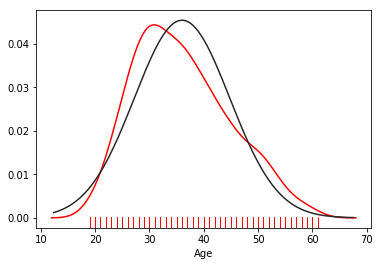

In [5]:
from scipy.stats import norm
sns.distplot(data['Age'], hist=False, color='r', rug=True, fit=norm);

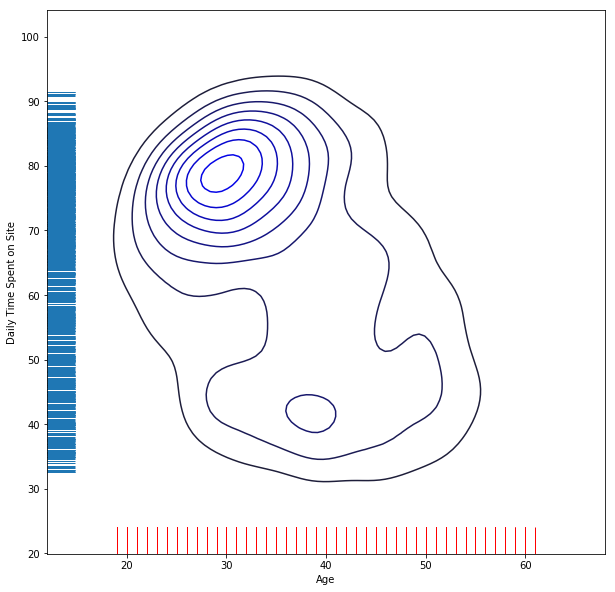

In [6]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data.Age, data['Daily Time Spent on Site'], color="b", ax=ax)
sns.rugplot(data.Age, color="r", ax=ax)
sns.rugplot(data['Daily Time Spent on Site'], vertical=True, ax=ax)

From the picture, we can conclude that younger users spend more time on the site. This implies that users of the age between 20 and 40 years can be the main target group for the marketing campaign. Hypothetically, if we have a product intended for middle-aged people, this is the right site for advertising. Conversely, if we have a product intended for people over the age of 60, it would be a mistake to advertise on this site.

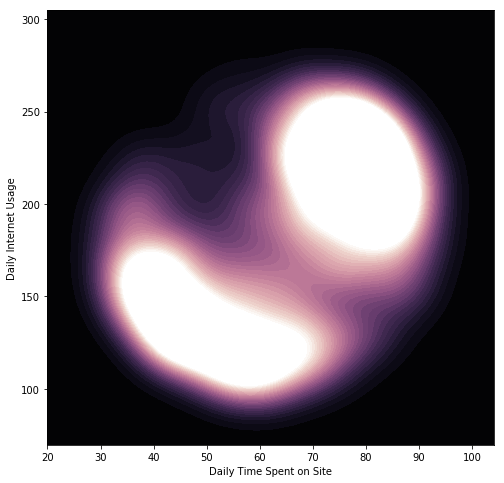

In [7]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(as_cmap=True, start=0, dark=0, light=3, reverse=True)
sns.kdeplot(data["Daily Time Spent on Site"], data['Daily Internet Usage'],
    cmap=cmap, n_levels=100, shade=True)

From the figure above, it is clear that users who spend more time on the internet also spend more time on the site.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7ABBC6F28>,
      dtype=object)

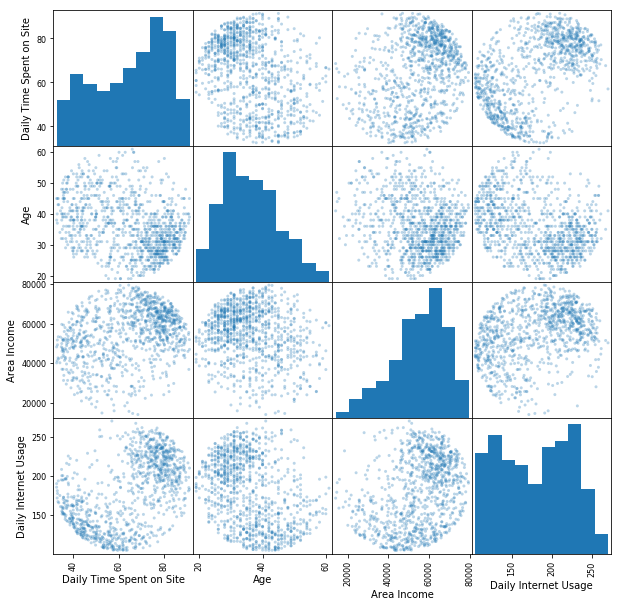

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']],
    alpha=0.3, figsize=(10,10))

In [9]:
object_variables = ['Ad Topic Line', 'Ad Platform', 'Country']
data[object_variables].describe(include=['O'])

,Ad Topic Line,Ad Platform,Country
count,1000,1000,1000
unique,1000,4,237
top,Compatible systemic function,Google Ads,Czech Republic
freq,1,280,9


In [10]:
pd.crosstab(index=data['Country'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


We have already seen, there are 237 different unique countries in our dataset and no single country is too dominant. A large number of unique elements will not allow a machine learning model to establish easily valuable relationships. For that reason, this variable will be excluded too.

In [11]:
data = data.drop(['Ad Topic Line', 'Ad Platform', 'Country'], axis=1)

Next, we will analyze the 'Timestamp' category. It represents the exact time when a user clicked on the advertisement. We will expand this category to 4 new categories: month, day of the month, day of the week, and hour. In this way, we will get new variables that an ML model will be able to process and find possible dependencies and correlations.

In [12]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Month'] = data['Timestamp'].dt.month
data['Day of the month'] = data['Timestamp'].dt.day
data["Day of the week"] = data['Timestamp'].dt.dayofweek
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


In [13]:
from sklearn.model_selection import train_test_split

X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'Day of the month' ,'Day of the week']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
model_1 = LogisticRegression(solver='lbfgs')
final_model2 = model_1.fit(X_train, y_train)
predictions_LR = model_1.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.906060606060606

Confusion matrix:
[[158   4]
 [ 27 141]]


The accuracy of the logistic regression model is 0.906 or 90.6%. Our confusion matrix tells us that the total number of accurate predictions is 158 + 141 = 299. On the other hand, the number of incorrect predictions is 27 + 4 = 31. We can be satisfied with the prediction accuracy of our model.

In [16]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
final_model = model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_DT))

Decision tree accuracy: 0.9333333333333333

Confusion matrix:
[[152  10]
 [ 12 156]]


The confusion matrix shows us that the 310 predictions have been done correctly and that there are only 20 incorrect predictions. Additionally, Decision Tree accuracy is better by about 3% in comparison to the first regression model.

In [17]:
import pickle

In [18]:
classify_cust = final_model

pickle_out = open('./classify_cust_click1.pkl', 'wb')
pickle.dump(classify_cust, pickle_out)
pickle_out.close()

In [19]:
from sklearn.externals import joblib
import numpy as np

In [20]:
read_cust_pkl = open('./classify_cust_click1.pkl','rb')
clf = joblib.load(read_cust_pkl)

#my_prediction = clf.predict([[70.79, 31, 74535.94, 184.1, 0, 3, 15, 3]])
#my_prediction

my_prediction = clf.predict([[57.76, 41, 47861.93, 105.15, 0, 6, 12, 0]])
my_prediction

array([1], dtype=int64)

In [ ]:
Connection to big query 
Theory on normal distribution
Specify the dependency between each of the variables
Why certain variables were dropped
Why was date clicked is important and it's impact overall on prediction
why Logistic regression and it's accuracy score and conf matrix
why descicion tree clasifier and it's accuracy score and conf matrix


explain the pipeline and pickle generation and usage in Flask